This notebook is just to export our fine tuned v2 yolov8s model to onnx/tflite format for deployment on a mobile app.

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.4/982.4 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [20]:
from ultralytics import YOLO

# Load the YOLO8 model
model = YOLO("/content/yolov8s_finetune2.pt")

# Export the model to tflite format
model.export(
    format="tflite",
    )

Ultralytics 8.3.113 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from '/content/yolov8s_finetune2.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 11, 8400) (21.5 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx2tf>=1.26.3', 'tflite_support'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 244.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 245.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.6/446.6 kB 307.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 235.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

100%|██████████| 1.11M/1.11M [00:00<00:00, 236MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 49.00file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.50...
ONNX: export success ✅ 1.7s, saved as '/content/yolov8s_finetune2.onnx' (42.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.2...
TensorFlow SavedModel: export success ✅ 102.0s, saved as '/content/yolov8s_finetune2_saved_model' (107.5 MB)

TensorFlow Lite: starting export with tensorflow 2.18.0...
TensorFlow Lite: export success ✅ 0.0s, saved as '/content/yolov8s_finetune2_saved_model/yolov8s_finetune2_float32.tflite' (42.7 MB)

Export complete (102.4s)
Results saved to /content
Predict:         yolo predict task=detect model=/content/yolov8s_finetune2_saved_model/yolov8s_finetune2_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=/content/yolov8s_finetune2_saved_model/yolov8s_finetune2_float32.tflite imgsz=640 data=/content/roboflow_dataset2/data.yaml  
Visualize:       https://netron.app


'/content/yolov8s_finetune2_saved_model/yolov8s_finetune2_float32.tflite'

In [3]:
# Load the exported ONNX model
onnx_model = YOLO("/content/yolov8s_finetune2.pt")

# Run inference
results = onnx_model("/content/20250420_185533-0-_jpg.rf.6fed6c5789a0ec3f0339e917f1f25af0.jpg")


image 1/1 /content/20250420_185533-0-_jpg.rf.6fed6c5789a0ec3f0339e917f1f25af0.jpg: 640x480 3 ORANGE_PEPPERs, 107.2ms
Speed: 5.5ms preprocess, 107.2ms inference, 29.7ms postprocess per image at shape (1, 3, 640, 480)


In [9]:
from IPython import display
from PIL import Image
import IPython

print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'APPLES', 1: 'AVOCADOS', 2: 'LEMONS', 3: 'LIMES', 4: 'ORANGE_PEPPER', 5: 'RED_PEPPER', 6: 'TOMATOES'}
obb: None
orig_img: array([[[ 56,  55,  57],
        [ 56,  55,  57],
        [ 58,  57,  59],
        ...,
        [227, 248, 223],
        [227, 248, 223],
        [227, 248, 223]],

       [[ 55,  54,  56],
        [ 56,  55,  57],
        [ 57,  56,  58],
        ...,
        [227, 248, 223],
        [227, 248, 223],
        [227, 248, 223]],

       [[ 55,  54,  56],
        [ 56,  55,  57],
        [ 58,  57,  59],
        ...,
        [227, 248, 223],
        [227, 248, 223],
        [227, 248, 223]],

       ...,

       [[ 77, 103, 140],
        [ 76, 102, 139],
        [ 75, 101, 138],
        ...,
        [165, 166, 170],
        [164, 165, 169],
        [155, 156, 160]],

       [[ 77, 103, 140],
        [ 76, 102, 139],
        

In [21]:
!zip -r /content/yolov8s_finetune2_tflite.zip /content/yolov8s_finetune2_saved_model

  adding: content/yolov8s_finetune2_saved_model/ (stored 0%)
  adding: content/yolov8s_finetune2_saved_model/saved_model.pb (deflated 9%)
  adding: content/yolov8s_finetune2_saved_model/yolov8s_finetune2_float16.tflite (deflated 8%)
  adding: content/yolov8s_finetune2_saved_model/fingerprint.pb (stored 0%)
  adding: content/yolov8s_finetune2_saved_model/variables/ (stored 0%)
  adding: content/yolov8s_finetune2_saved_model/variables/variables.index (deflated 33%)
  adding: content/yolov8s_finetune2_saved_model/variables/variables.data-00000-of-00001 (deflated 86%)
  adding: content/yolov8s_finetune2_saved_model/metadata.yaml (deflated 34%)
  adding: content/yolov8s_finetune2_saved_model/yolov8s_finetune2_float32.tflite (deflated 16%)
  adding: content/yolov8s_finetune2_saved_model/assets/ (stored 0%)


In [22]:
from google.colab import files

files.download("/content/yolov8s_finetune2_tflite.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Number of detections found: 3
Generating annotated image using result.plot()...


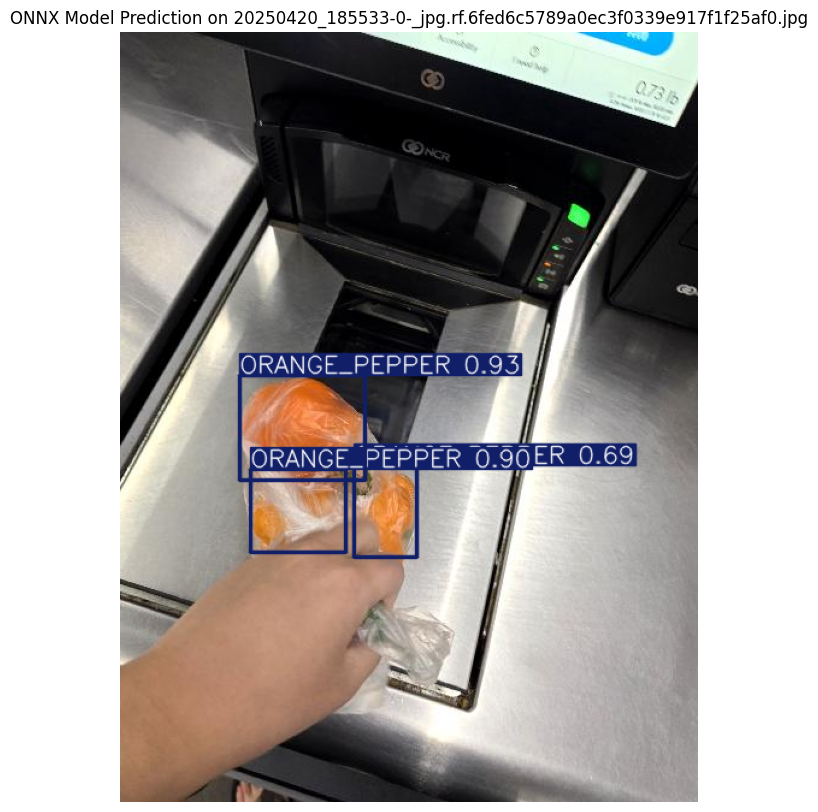

In [11]:
from ultralytics import YOLO
import os
from PIL import Image as PilImage
import matplotlib.pyplot as plt
import cv2

# Test image
image_path = "/content/20250420_185533-0-_jpg.rf.6fed6c5789a0ec3f0339e917f1f25af0.jpg"

result = results[0]

num_detections = len(result.boxes)
print(f"Number of detections found: {num_detections}")

print("Generating annotated image using result.plot()...")

# result.plot() returns a NumPy array (BGR format) with boxes/labels drawn
annotated_image_bgr = result.plot()

# Display using Matplotlib
plt.figure(figsize=(10, 10))
# Convert BGR (from OpenCV used in plot()) to RGB for Matplotlib
plt.imshow(cv2.cvtColor(annotated_image_bgr, cv2.COLOR_BGR2RGB))
plt.title(f"ONNX Model Prediction on {os.path.basename(image_path)}")
plt.axis('off')
plt.show()